# **Best Solution Search**

By J. Venkateswaran and R. Deval

**Objective:** In lab 06, we will use power of random search to identify best solution for a given test function. A test function is useful to evaluate characteristics of optimization algorithms.  
* For this purpose we will use a specific type of test function called Rosenbrock Function (a *non-linear* function) to determine best solution using random search.
* Furthermore, we will try to demostrate visualization of best solution (using Random Search) via., Pareto Frontier in Multi-Objective Problem (with constraints).

**Note:** Please go through the instructions carefully.

## **1. Single Objective Search**



### **Rosenbrock Function**
Let

$$f(x,y) = (1-x)^2 + 100(y-x^2)^2$$

with $x,y \in (-∞, ∞)$. It is known that $f(1,1) = 0$ is a global optima for Rosenbrock Function. Figure given below is a plot for Rosenbrock Function with colourmap as $log_{10}f(x,y)$.

More details [Click Here](https://en.wikipedia.org/wiki/Rosenbrock_function)



**Fig A: Contour Plot for Rosenbrock Function**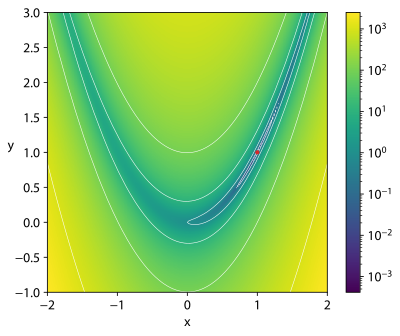


In this lab, we will perform the following inclass activities followed with tasks.
* Best Solution search (without/with constraint(s))
* Creating a contour plot (without/with contraint(s))
* Perform multi-objective search for best solution

In [ ]:
import random as rnd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import pandas as pd

#### **Best Random Search for Rosenbrock Function**

In [ ]:
# 2-dimensional Rosenbrock Function

def Rosenbrock(x1,x2):
  """takes (x1,x2) as input and returns evaluated value for f(x1,x2)"""
  return ((1-x1)**2 + 100*(x2 -x1**2)**2)

X1 = X2 = Y = []
N = 10 # number of random points used in search space
lb = [-4, -4]  # vector of lower bound for (x1,x2)
ub = [4, 4]  # vector of lower bound for (x1,x2)

# below we generate N random points uniformly from a given support of decision variables
X1 = np.random.uniform(lb[0], ub[0], N)
X2 = np.random.uniform(lb[1], ub[1], N)

# Evaluate Rosenbrock Function value for randomly selected points in X1, X2
for i in range(N):
  Y.append(Rosenbrock(X1[i], X2[i]))


#display Results
print('\n Monte Carlo Simulation based \n')
print( 'Best decision variable : ', X1[np.argmin(Y)], X2[np.argmin(Y)])
print('Best objective    : ', min(Y))
print('-----------------------------------------------------------------')
print( 'Worst decision variable : ', X1[np.argmax(Y)], X2[np.argmax(Y)])
print('Worst objective    : ', max(Y))
print('=================================================================')

X_optimum = [1,1] #Known from theory
print("Known Optimal decision variables:",X_optimum)
print("Known Optimal objective =",Rosenbrock(X_optimum[0], X_optimum[1]))


 Monte Carlo Simulation based 

Best decision variable :  -0.5026706614734184 -0.4657524287153354
Best objective    :  53.87221759444493
-----------------------------------------------------------------
Worst decision variable :  -2.736291292044603 -1.9743845010080712
Worst objective    :  8966.288375000318
Known Optimal decision variables: [1, 1]
Known Optimal objective = 0


**🛑 Task A:** Try to increase number of samples, N as ($10^1, 10^2, 10^3, ....,10^6$) and plot the 'best' objective found over diffrent sample sizes


In [ ]:
# 2-dimensional Rosenbrock Function

def Rosenbrock(x1,x2):
  """takes (x1,x2) as input and returns evaluated value for f(x1,x2)"""
  return ((1-x1)**2 + 100*(x2 -x1**2)**2)
n_points = [10,10**2,10**3,10**4,10**5,10**6]
index_n_points=[1,2,3,4,5,6]
best_sol=[]
for i in range(6):
  X1 = X2 = Y = []
  N = n_points[i] # number of random points used in search space
  lb = [-4, -4]  # vector of lower bound for (x1,x2)
  ub = [4, 4]  # vector of lower bound for (x1,x2)

# below we generate N random points uniformly from a given support of decision variables
  X1 = np.random.uniform(lb[0], ub[0], N)
  X2 = np.random.uniform(lb[1], ub[1], N)

# Evaluate Rosenbrock Function value for randomly selected points in X1, X2
  for k in range(N):
    Y.append(Rosenbrock(X1[k], X2[k]))


#display Results
  print('\n Monte Carlo Simulation based \n')
  print( 'Best decision variable : ', X1[np.argmin(Y)], X2[np.argmin(Y)])
  print('Best objective    : ', min(Y))
  print('-----------------------------------------------------------------')
    #print( 'Worst decision variable : ', X1[np.argmax(Y)], X2[np.argmax(Y)])
    #print('Worst objective    : ', max(Y))
    #print('=================================================================')
  best_sol.append(min(Y))

  X_optimum = [1,1] #Known from theory
  print("Known Optimal decision variables:",X_optimum)
  print("Known Optimal objective =",Rosenbrock(X_optimum[0], X_optimum[1]))

plt.plot(index_n_points,best_sol)


NameError: ignored

**Plotting a Contour Plot for Rosenbrock Function**

**Contour Plot:** A contour plot, also known as a contour map or contour chart, is a graphical representation of three-dimensional data in a two-dimensional format. Contour plots are particularly useful for visualizing data that has both x and y coordinates and a third variable that is represented by contour lines.

**🛑 ToDo (solved):** Given above in **Fig A** is a contour plot with x,y are two axis and color (or shades) represents values of Rosenbrock function. Below is a partially completed code which you need to complete in order to create a contour plot(similar to Fig A) and get validated by TAs.

(**Hint**: Remember in order to create a contour plot you need to first create a meshgrid which is used to evaluate Rosenbrock Function value in this grid. A meshgrid is a two-dimensional grid of points or coordinates created from two one-dimensional arrays.)

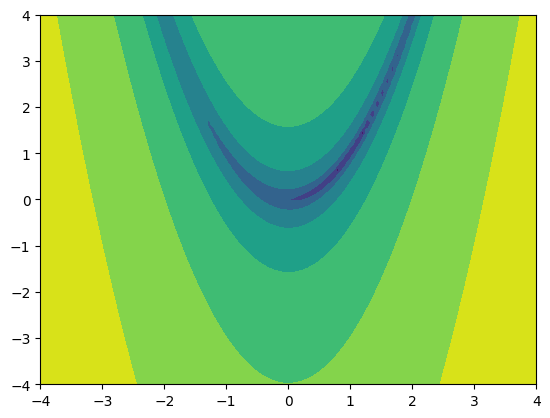

In [ ]:
k = 100 # number of intermediate points between support of x1 and x2

# intermediate points of x1 and x2 as rows and cols respectively
rows = np.linspace(lb[0], ub[0], k+1)
cols = np.linspace(lb[1], ub[1], k+1)

# use np.meshgrid() function to create meshgrid with rows and cols as input arguments
[meshX1, meshX2] = np.meshgrid(rows, cols)

# evaluate Rosenbrock Functional value at each (X1, Y1) in meshgrid
Z = Rosenbrock(meshX1,meshX2)
# It is a better practice to scale above grid into log with base 10
Z2 = np.log10(Z)

#plot the contour plot using contourf() with meshgird and evaluated value at each point of meshgrid
fig, ax = plt.subplots(1,1)
# there are two in-built functions contour() and contourf(), herein use contourf (feel free to explore contour() function)
ax.contourf(meshX1, meshX2, Z2)

#### **Best Random Search for Rosenbrock Function with a constraint**

Conisder the above Rosenbrock Function, suppose we have additional constaint and our objective to find optima for objective function subject to some constraints.

In order to approach such problem we will simply generate random points from the given support of decision variables and check for condition to satisfy these constraints. Consider the following modified (constrained) Rosenbrock Problem:

$$f(x,y) = (1-x)^2 + 100(y-x^2)^2$$

subject to

$$(x-1)^3 - y +1 \leq 0 $$

$$ x+y - 2 \leq 0 $$

with $x \in [-1.5, 1.5]$ and $y \in [-0.5, 2.5]$. \\
Further, $f(1,1) = 0$ is known to be global optima. For more details [Go to](https://en.wikipedia.org/wiki/Test_functions_for_optimization) in "***Rosenbrock function constrained with a cubic and a line***"

**Fig B: Rosenbrock Function with constraints** 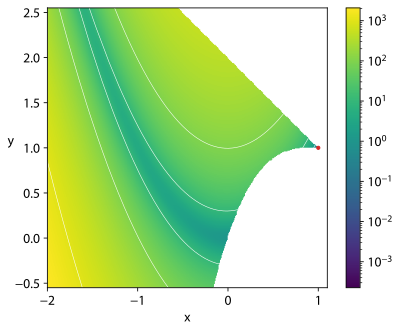

**🛑 Task B:** Now your immediate task is to perform both finding best solution using random search for constrained Rosenbrook Function and create a contour plot which matches with Fig B above.

**Hint**: You need to define a new function, say, RosenbrockConstrained() instead of Rosenbrock().  IN this RosenbrockConstrained() function, (i) check feasibility of constaints, (ii) if feasible return the function value, (iii) if infeasible, return INFINITY [np.inf], or any large value.


**TO DO:** Perform basic search using appropriate value of N;  then make a contour plot. Show results to TAs.

<ipython-input-5-823b2ae3a4cf>:32: RuntimeWarning: divide by zero encountered in log10
  Z2 = np.log10(Z)
<ipython-input-5-823b2ae3a4cf>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.colorbar().set_ticklabels(levels)


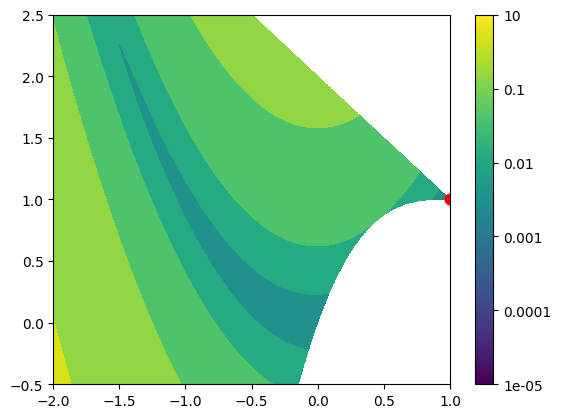

In [ ]:

def RosenbrockConstrained(x1,x2):
  if (x1-1)**3-x2+1<=0 and x1+x2-2<=0:
    return ((1-x1)**2 + 100*(x2 -x1**2)**2)
  else:
    return np.inf
X1=[]
X2=[]
Y=[]
lb = [-2, -0.5]  # vector of lower bound for (x1,x2)
ub = [1, 2.5]  # vector of lower bound for (x1,x2)


k = 1000 # number of intermediate points between support of x1 and x2

  # intermediate points of x1 and x2 as rows and cols respectively
rows = np.linspace(lb[0], ub[0], k+1)
cols = np.linspace(lb[1], ub[1], k+1)

  # use np.meshgrid() function to create meshgrid with rows and cols as input arguments
[meshX1, meshX2] = np.meshgrid(rows, cols)

Z=[]
for i in range(len(cols)):
    Z.append([])
    for j in range(len(rows)):
      Z[i].append(RosenbrockConstrained(rows[j],cols[i]))
  # evaluate Rosenbrock Functional value at each (X1, Y1) in meshgrid

  # It is a better practice to scale above grid into log with base 10


Z2 = np.log10(Z)
  #plot the contour plot using contourf() with meshgird and evaluated value at each point of meshgrid
fig, ax = plt.subplots(1,1)
  # there are two in-built functions contour() and contourf(), herein use contourf (feel free to explore contour() function)
levels=[10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),10,100,1000,10000,100000]
plt.contourf(meshX1,meshX2,Z2)
plt.scatter(1,1,c='r',s=60)
#ax.contour(meshX1,meshX2,Z2)
plt.colorbar().set_ticklabels(levels)








In [ ]:

def RosenbrockConstrained(x1,x2):
  if (x1-1)**3-x2+1<=0 and x1+x2-2<=0:
    return ((1-x1)**2 + 100*(x2 -x1**2)**2)
  else:
    return np.inf
X1=[]
X2=[]
Y=[]
lb = [-2, -0.5]  # vector of lower bound for (x1,x2)
ub = [1, 2.5]  # vector of lower bound for (x1,x2)
N=10000
# below we generate N random points uniformly from a given support of decision variables
X1 = np.random.uniform(lb[0], ub[0], N)
X2 = np.random.uniform(lb[1], ub[1], N)

for i in range(len(X1)):
  Y.append(RosenbrockConstrained(X1[i], X2[i]))

[m1,m2]=np.meshgrid(X1,X2)



## **2. Visualizing Multi-objective Problems**

**Multi-objective Optimization (MOO):** In such problem your is aim to simultaneously optimize multiple conflicting objectives or criteria. In MOO, there is no single solution that can optimize all objectives at once because these objectives often compete with each other. In order to find a best solution set, your goal is to identify a set of solution from Pareto Front by balancing tradeoff between two (or more than two) objectives.


**Pareto Front:** Let's say you have a multi-objective optimization problem with '$n$' objectives, and you are trying to minimize these objectives. A solution '$A$' is said to dominate another solution '$B$' if:

* For at least one objective, solution '$A$' is better than solution '$B$' (i.e., it has a lower value).
* For all other objectives, solution '$A$' is at least as good as solution '$B$' (i.e., it has a value that is equal to or better than solution '$B$'). \\

A solution '$X$' is part of the Pareto Frontier if there is no other solution '$Y$' in the search space that dominates '$X$.' In other words, '$X$' is on the Pareto Frontier if there is no way to improve any of its objectives without worsening at least one other objective.

### **Bihn-Korn Function**

Given below is a muti-objective function with $f_1(x,y)$ and $f_2(x,y)$ as two objectives and two constraints defined as $C_1(x,y)$ and $C_2(x,y)$.

$$\begin{equation}
f_1(x,y) = 4x^2 + 4y^2 \\
\hspace{3.5em} f_2(x,y) = (x-5)^2 + (y-5)^2
\end{equation}$$

subject to

$$\begin{equation}
C_1(x,y): (x-5)^2 + y^2 \leq 25 \\
\hspace{2.5 em} C_2(x,y): (x-8)^2 + (y+3)^2 \geq 7.7
\end{equation}$$

with support for $x \in [0,3]$ and $y \in [0,5]$.


**Fig C: Pareto Front for Bihn-Korn Function** 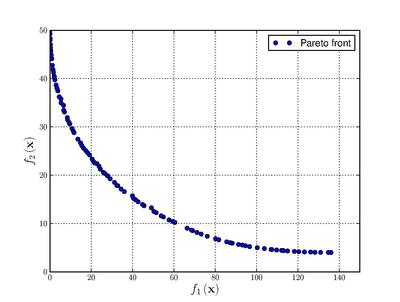

**🛑 Task 2A:** Using approach of constrained Rosenbrock Function, define Bihn-Korn Function which takes $x$ and $y$ and provides $f_1(x,y)$ and $f_2(x,y)$ as output given that $C_1(x,y)$ and $C_2(x,y)$ constraints are also satisfied.

In [ ]:

def bihnkorn(x1,x2):
  f1=4*(x1**2)+4*(x2**2)
  f2=(x1-5)**2+(x2-5)**2
  if (x1-5)**2+x2**2<=25 and (x1-8)**2+(x2+3)**2>=7.7:

    return f1,f2

  else:
    return np.inf,np.inf



**🛑 Task 2B:** Let $N$ be the number of points in search space. Create a dataset $X_1$, $X_2$ which are feasible (belong to feasible region) and evaluate both $f_1(X_1, X_2)$ and $f_2(X_1, X_2)$.     

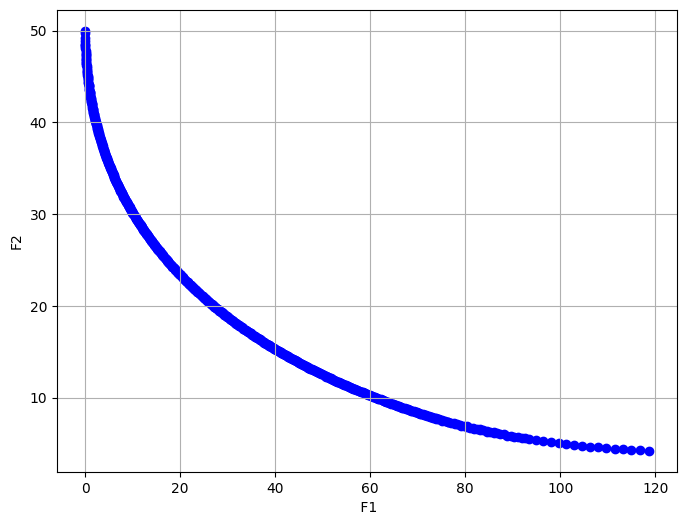

In [ ]:
import matplotlib.pyplot as plt
X1=[]
X2=[]
Y=[]
lb = [0, 0]  # vector of lower bound for (x1,x2)
ub = [3, 5]  # vector of lower bound for (x1,x2)
N=100
# below we generate N random points uniformly from a given support of decision variables
X1 = np.linspace(lb[0], ub[0], N)
X2 = np.linspace(lb[1], ub[1], N)
for i in range(len(X2)):
  Y.append([])
  for j in range(len(X1)):

    Y[i].append(bihnkorn(X1[j], X2[i]))
F1=[]
F2=[]

for i in range(len(Y)):
  for j in range(len(Y)):
    F1.append(Y[i][j][0])
    F2.append(Y[i][j][1])



#print(X1)
#print(X2)
#print(Y[1][1])
pareto_front = []

for i in range(len(F1)):
    is_pareto_point = True
    for j in range(len(F1)):
        if i != j and F1[i] != None and F2[i] != None and F1[j]!=None and F2[j]!=None and F1[j] <= F1[i] and F2[j] <= F2[i]:
            is_pareto_point = False
            break
    if is_pareto_point:
        pareto_front.append((F1[i], F2[i]))

pareto_front = np.array(pareto_front)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pareto_front[:, 0], pareto_front[:, 1], label="Pareto Front", color="blue")



# pf_X = [pair[0] for pair in pareto_front]
#pf_Y = [pair[1] for pair in pareto_front]
#plt.plot(pf_X, pf_Y)
plt.xlabel(" F1")
plt.ylabel("F2")

plt.grid()
plt.show()


**🛑 Task 2C:** Visualize above generate dataset with appropriate tools. (Hint: Your obtained plot will roughly represent Fig C).

41.530864197530875
(1.6790123456790125, 41.530864197530875)
1.6790123456790125
(inf, inf)
[[(0.0, 50.0), (0.4444444444444444, 46.777777777777786), (1.7777777777777777, 43.77777777777777), (4.0, 41.0), (7.111111111111111, 38.44444444444444), (11.111111111111109, 36.111111111111114), (16.0, 34.0), (21.77777777777777, 32.111111111111114), (28.444444444444443, 30.444444444444446), (36.0, 29.0)], [(inf, inf), (1.6790123456790125, 41.530864197530875), (3.0123456790123457, 38.53086419753086), (5.234567901234568, 35.75308641975309), (8.345679012345679, 33.19753086419753), (12.345679012345677, 30.864197530864203), (17.23456790123457, 28.75308641975309), (23.01234567901234, 26.864197530864203), (29.679012345679013, 25.197530864197535), (37.23456790123457, 23.75308641975309)], [(inf, inf), (5.382716049382717, 36.90123456790124), (6.71604938271605, 33.90123456790123), (8.938271604938272, 31.123456790123456), (12.049382716049383, 28.567901234567902), (16.04938271604938, 26.23456790123457), (20.9382

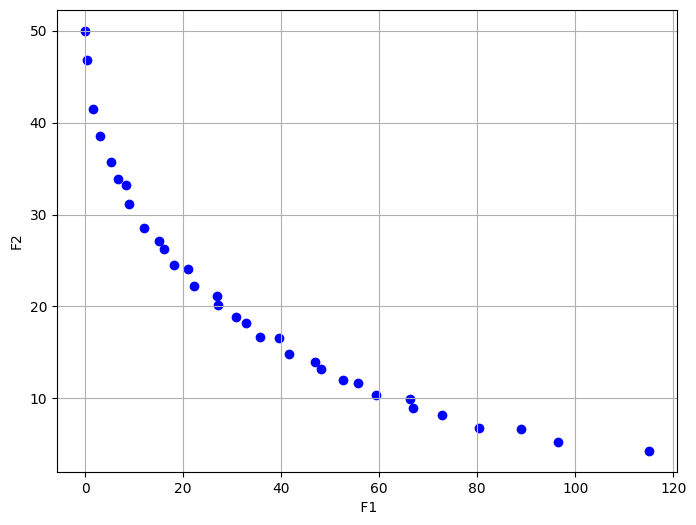

In [ ]:
import matplotlib.pyplot as plt
X1=[]
X2=[]
Y=[]
lb = [0, 0]  # vector of lower bound for (x1,x2)
ub = [3, 5]  # vector of lower bound for (x1,x2)
N=10
# below we generate N random points uniformly from a given support of decision variables
X1 = np.linspace(lb[0], ub[0], N)
X2 = np.linspace(lb[1], ub[1], N)
for i in range(len(X2)):
  Y.append([])
  for j in range(len(X1)):

    Y[i].append(bihnkorn(X1[j], X2[i]))
F1=[]
F2=[]
print(Y[1][1][1])
print(Y[1][1])
print(Y[1][1][0])
print(Y[1][0])
print(Y)
for i in range(len(Y)):
  for j in range(len(Y)):
    F1.append(Y[i][j][0])
    F2.append(Y[i][j][1])


#pareto function



pareto_front = []

for i in range(len(F1)):
    is_pareto_point = True
    for j in range(len(F1)):
        if i != j and F1[i] != None and F2[i] != None and F1[j]!=None and F2[j]!=None and F1[j] <= F1[i] and F2[j] <= F2[i]:
            is_pareto_point = False
            break
    if is_pareto_point:
        pareto_front.append((F1[i], F2[i]))

pareto_front = np.array(pareto_front)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pareto_front[:, 0], pareto_front[:, 1], label="Pareto Front", color="blue")



# pf_X = [pair[0] for pair in pareto_front]
#pf_Y = [pair[1] for pair in pareto_front]
#plt.plot(pf_X, pf_Y)
plt.xlabel(" F1")
plt.ylabel("F2")

plt.grid()
plt.show()




**🛑 Task 2D:** Consider last digit of your **roll number**,
* If it is **odd** (`1,3,5,7,9`) then your task is to create a **contour plot with $f_1(x,y)$ as objective subject to $C_1(x,y)$ and $C_2(x,y)$** constraints.
* If it is **even** (`0,2,4,6,8`) then your task is to create a **contour plot with $f_2(x,y)$ as objective subject to $C_1(x,y)$ and $C_2(x,y)$** constraints.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

<ipython-input-10-3a3dcb527450>:35: RuntimeWarning: divide by zero encountered in log10
  Z = np.log10(F1)


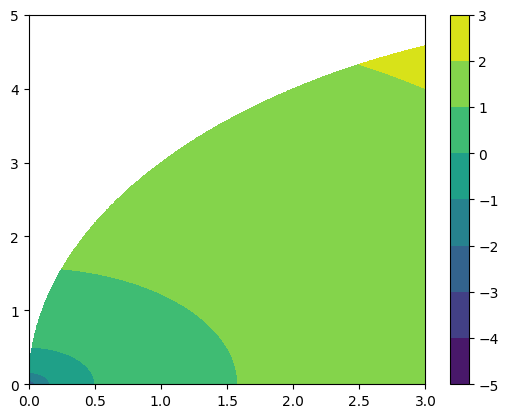

In [ ]:
def newbihnkorn(x1,x2):
  f1=4*(x1**2)+4*(x2**2)

  if (x1-5)**2+x2**2<=25 and (x1-8)**2+(x2+3)**2>=7.7:

    return f1

  else:
    return np.inf

X1=[]
X2=[]
F1=[]
lb = [0, 0]  # vector of lower bound for (x1,x2)
ub = [3, 5]  # vector of lower bound for (x1,x2)
N=1000
# below we generate N random points uniformly from a given support of decision variables
X1 = np.linspace(lb[0], ub[0], N)
X2 = np.linspace(lb[1], ub[1], N)
[mesh1,mesh2]=np.meshgrid(X1,X2)
for i in range(len(X2)):
  F1.append([])
  for j in range(len(X1)):

    F1[i].append(newbihnkorn(X1[j], X2[i]))

print(F1)


#plt.contourf(mesh1,mesh2,F1)
levels=[10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),10,100,1000,10000,100000]

#ax.contour(meshX1,meshX2,Z2)
#plt.colorbar().set_ticklabels(levels)
Z = np.log10(F1)
mycamp=plt.get_cmap()
plt.contourf(mesh1,mesh2,Z)
ax.contourf(mesh1,mesh2,F1,cmap=mycamp)
plt.colorbar()

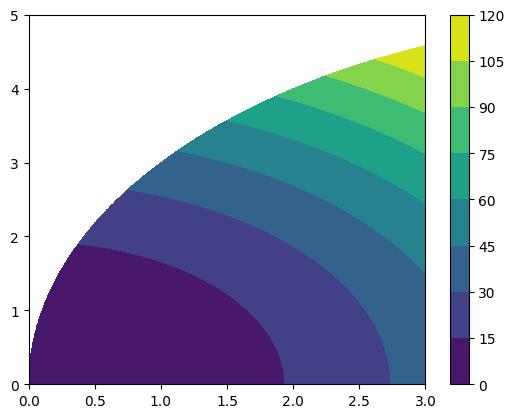

In [ ]:
# without log
plt.contourf(mesh1,mesh2,F1)
plt.colorbar()

# **(!) Submission Required**

**Que 1:** Use random search to identify the optimum for

* **Beale Function**, if your last digit of Roll Number is odd (ending with `1, 3, 5, 7, 9`)
* **Goldstein-Price function**, if ending digit is even i.e., `0, 2, 4, 6, 8.




In [ ]:

def bealefunction(x1,x2):
  """takes (x1,x2) as input and returns evaluated value for f(x1,x2)"""
  f1=(1.5-x1+x1*x2)**2+(2.25-x1+x1*x2**2)**2+(2.625-x1+x1*x2**3)**2
  return f1

X1 = X2 = Y = []
N = 1000 # number of random points used in search space
lb = [-4, -4]  # vector of lower bound for (x1,x2)
ub = [4, 4]  # vector of lower bound for (x1,x2)

# below we generate N random points uniformly from a given support of decision variables
X1 = np.random.uniform(lb[0], ub[0], N)
X2 = np.random.uniform(lb[1], ub[1], N)


for i in range(N):
  Y.append(bealefunction(X1[i], X2[i]))


#display Results

print( 'Best decision variable : ', X1[np.argmin(Y)], X2[np.argmin(Y)])
print('Best objective    : ', min(Y))

print( 'Worst decision variable : ', X1[np.argmax(Y)], X2[np.argmax(Y)])
print('Worst objective    : ', max(Y))


X_optimum = [-4.5,4.5] #Known from theory
print("Known Optimal decision variables:",X_optimum)
print("Known Optimal objective =",bealefunction(X_optimum[0], X_optimum[1]))


Best decision variable :  3.468863155017785 0.6257486189558268
Best objective    :  0.060184325304017586
Worst decision variable :  -3.632451526413784 -3.9964980595175916
Worst objective    :  59807.34711540148
Known Optimal decision variables: [-4.5, 4.5]
Known Optimal objective = 169680.83203125


<ipython-input-30-31fa58114a21>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.colorbar().set_ticklabels(levels)


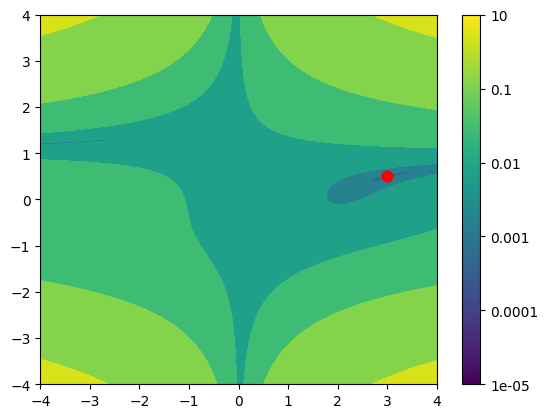

In [ ]:
M=[]
for i in range(20):
  X1 = np.linspace(lb[0], ub[0], N)
  X2 = np.linspace(lb[1], ub[1], N)
  [mesh1,mesh2]=np.meshgrid(X1,X2)

for i in range(len(X2)):
  M.append([])
  for j in range(len(X1)):

    M[i].append(bealefunction(X1[j], X2[i]))
M1=np.log10(M)

fig, ax = plt.subplots(1,1)
  # there are two in-built functions contour() and contourf(), herein use contourf (feel free to explore contour() function)

plt.contourf(mesh1,mesh2,M1)
plt.scatter(3,0.5,c='r',s=60)

plt.colorbar().set_ticklabels(levels)




**Que 2:**. 'Optimise' either **Himmelblau's function (if roll number ending odd)** OR **Cross-in-Tray function (if roll number ending even)**. These functions have 4 alternate solutions.  Do 20 sets of 'simulation-optimisation' runs, with N ~= 200000. Compute the number of times we are close to a particular known solution.  Create a contour plot also.

In [ ]:
def himmelblau_function(x1,x2):
  f1=(x1**2+x2-11)**2+(x1+x2**2-7)**2
  return f1
n_points = [10,10**2,10**3,10**4,10**5,10**6]

best_sol=[]
for i in range(6):
  X1 = X2 = Y = []
  N = 1000 # number of random points used in search space
  lb = [-6, -6]  # vector of lower bound for (x1,x2)
  ub = [6, 6]  # vector of lower bound for (x1,x2)

# below we generate N random points uniformly from a given support of decision variables
  X1 = np.linspace(lb[0], ub[0], N)
  X2 = np.linspace(lb[1], ub[1], N)


  for k in range(N):
    Y.append(himmelblau_function(X1[k], X2[k]))


#display Results

  #print( 'Best decision variable : ', X1[np.argmin(Y)], X2[np.argmin(Y)])
  #print('Best objective    : ', min(Y))

    #print( 'Worst decision variable : ', X1[np.argmax(Y)], X2[np.argmax(Y)])
    #print('Worst objective    : ', max(Y))
    #print('=================================================================')
  best_sol.append(min(Y))

  X_optimum = [3,2] #Known from theory
  #print("Known Optimal decision variables:",X_optimum)
  #print("Known Optimal objective =",himmelblau_function(X_optimum[0], X_optimum[1]))
print('optimal value = ',min(Y))



optimal value =  8.000052290064728


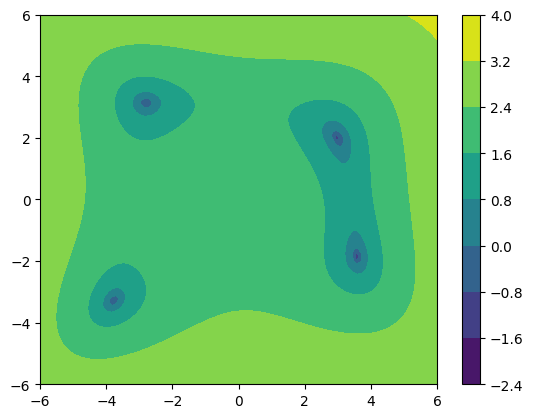

In [ ]:
def himmelblau_function(x1,x2):
  f1=(x1**2+x2-11)**2+(x1+x2**2-7)**2
  return f1
X1 = X2 = Y = []
N = 100 # number of random points used in search space
lb = [-6, -6]  # vector of lower bound for (x1,x2)
ub = [6, 6]  # vector of lower bound for (x1,x2)







  # below we generate N random points uniformly from a given support of decision variables
for i in range(20):
  X1 = np.linspace(lb[0], ub[0], N)
  X2 = np.linspace(lb[1], ub[1], N)
  [mesh1,mesh2]=np.meshgrid(X1,X2)

for i in range(len(X2)):
  Y.append([])
  for j in range(len(X1)):

    Y[i].append(himmelblau_function(X1[j], X2[i]))



Y2 = np.log10(Y)

#plt.contourf(mesh1,mesh2,F1)
#levels=[10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),10,100,1000,10000,100000]

#ax.contour(meshX1,meshX2,Z2)
#plt.colorbar().set_ticklabels(levels)
#mycamp=plt.get_cmap()
plt.contourf(mesh1,mesh2,Y2)
#ax.contourf(mesh1,mesh2,F1,cmap=mycamp)
plt.colorbar()

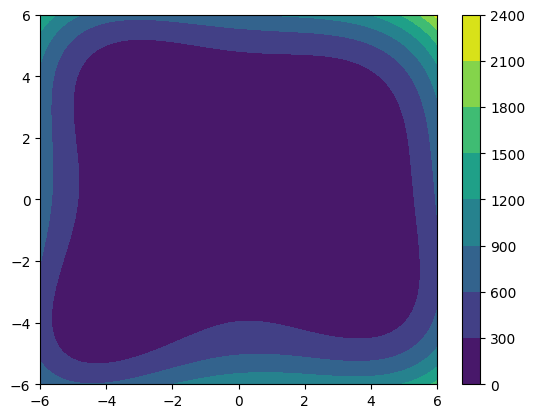

In [ ]:
#without log
plt.contourf(mesh1,mesh2,Y)
plt.colorbar()
